In [3]:
!where python

C:\Users\daani\Anaconda3\python.exe
C:\Users\daani\AppData\Local\Microsoft\WindowsApps\python.exe


In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
#Standard imports
import os
import pickle
import sys
sys.path.append('..')

#Third-party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import roc_curve

#Local imports
from src.localpaths import *
from src.data.make_dataset import load_training_data
from src.data.make_dataset import load_test_data
from src.models.train_model import store_model_and_results, print_model_results, load_model_results, load_pickled_models

In [6]:
pd.set_option('display.max_columns', 100)

# Load Featurized Data

In [7]:
X_train, y_train = load_training_data(final=True)

In [8]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,7,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0,1,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,29,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,3,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Load model results

In [9]:
model_results = load_model_results()

In [10]:
model_results.sort_values(by='roc_auc', ascending=False)

,model_filename,model_string,accuracy,precision,recall,f1,roc_auc
2,306603145201945600.pkl,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.805940,0.805940,0.805940,0.805940,0.805940
4,607043111193028608.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800828,0.800828,0.800828,0.800828,0.800828
1,183822185280526080.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.800070,0.800070,0.800070,0.800070
3,1071220852651428096.pkl,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.780194,0.774702,0.776030,0.781140,0.777541
0,1039052407272937472.pkl,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.727755,0.722075,0.726240,0.728323,0.724347


# Load our final model

In [14]:
model = load_pickled_models('607043111193028608.pkl')

In [17]:
most_important_features = sorted(zip(X_train.columns, model.feature_importances_), key=lambda x: x[1], reverse=True)
most_important_features

[('tenure', 0.46),
 ('MultipleLines_Yes', 0.06),
 ('PaymentMethod_Electronic check', 0.06),
 ('MultipleLines_No phone service', 0.04),
 ('OnlineSecurity_Yes', 0.04),
 ('StreamingTV_Yes', 0.04),
 ('StreamingMovies_No internet service', 0.04),
 ('StreamingMovies_Yes', 0.04),
 ('Contract_One year', 0.04),
 ('Contract_Two year', 0.04),
 ('SeniorCitizen', 0.02),
 ('Dependents', 0.02),
 ('PaperlessBilling', 0.02),
 ('InternetService_Fiber optic', 0.02),
 ('OnlineBackup_Yes', 0.02),
 ('TechSupport_Yes', 0.02),
 ('PaymentMethod_Mailed check', 0.02),
 ('gender', 0.0),
 ('Partner', 0.0),
 ('DeviceProtection_Yes', 0.0),
 ('PaymentMethod_Credit card (automatic)', 0.0)]

# Look at partial dependence plots
We are going to look at these plots to determine the direction of influence of each of these features.

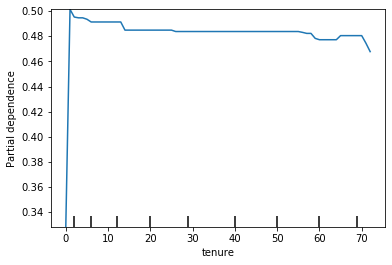

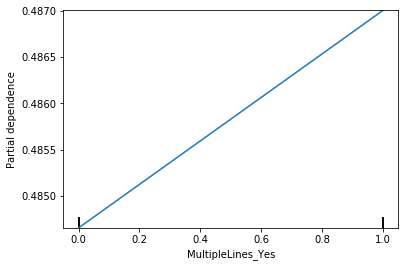

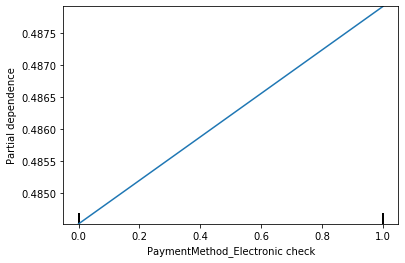

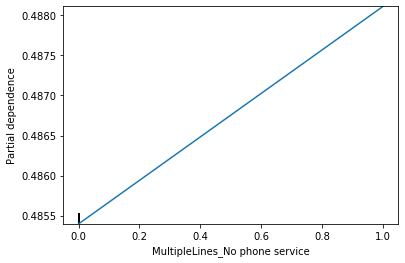

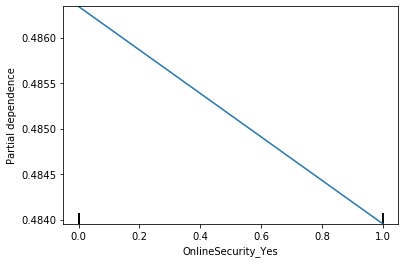

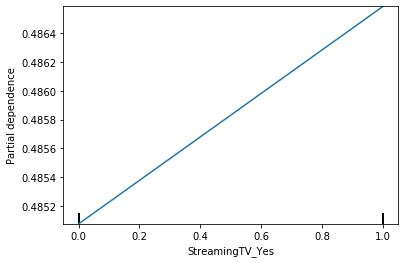

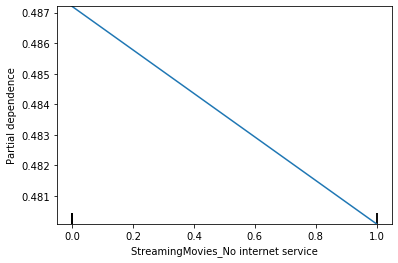

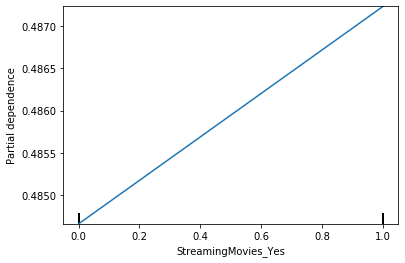

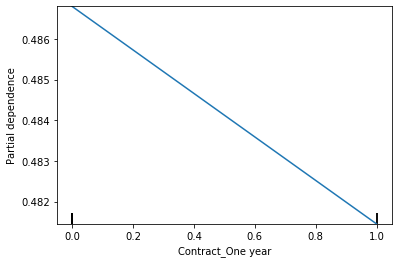

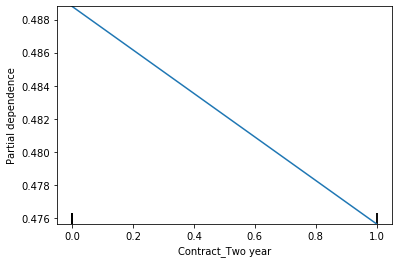

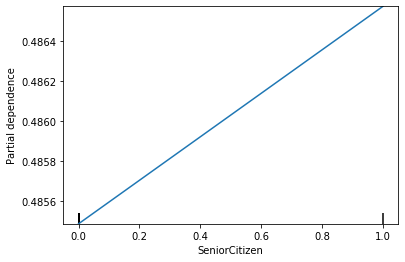

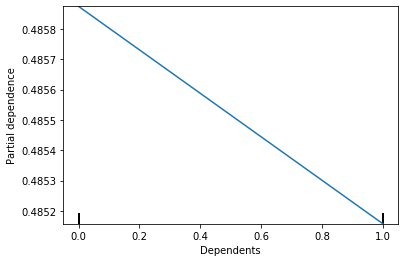

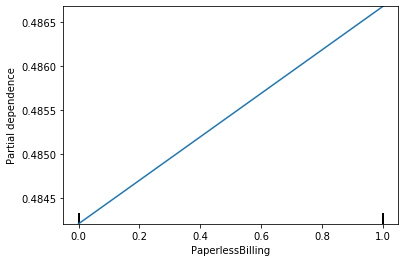

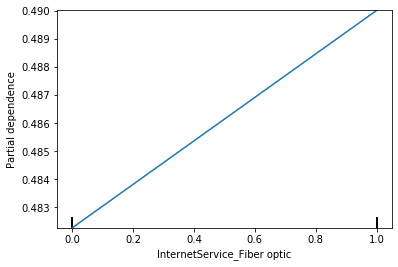

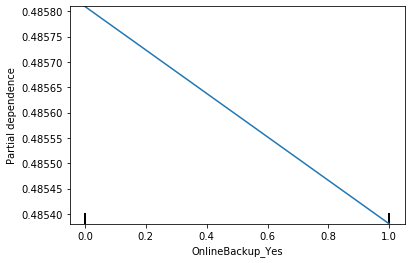

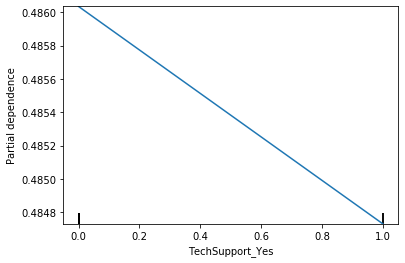

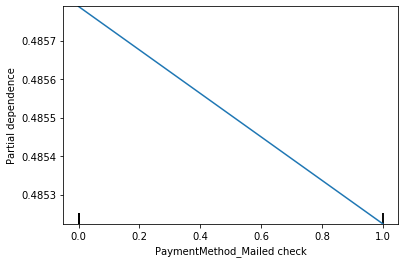

In [19]:
for col, val in most_important_features:
    if val > 0.01:
        plot_partial_dependence(model, X_train, [col])

# Visualize model training
In this section, we are going to use learning curves to visualize the training of our models to explore overfitting and underfitting

## Learning Curves

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train)

In [ ]:
train_sizes

In [ ]:
train_scores=np.mean(train_scores, axis=1)

In [ ]:
test_scores=np.mean(test_scores, axis=1)

In [ ]:
plt.plot(train_sizes, train_scores, label='Training Accuracy')
plt.plot(train_sizes, test_scores, label='Test Accuracy')
_ = plt.legend()
plt.ylim(0,1)

# Inspect a classic case of overfitting

In [ ]:
dt = load_pickled_models('1756373218170905600.pkl')

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(dt, X_train, y_train)
train_scores=np.mean(train_scores, axis=1)
test_scores=np.mean(test_scores, axis=1)

In [ ]:
plt.plot(train_sizes, train_scores, label='Training Accuracy')
plt.plot(train_sizes, test_scores, label='Test Accuracy')
_ = plt.legend()
plt.ylim(0,1.05)

# Visualize model results

In this section, we're going to use**ROC curves** to visualize the overall performance of our models

## ROC curves

In [ ]:
X_train_subset, X_validation, y_train_subset, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
model.fit(X_train_subset, y_train_subset)

In [ ]:
y_score = model.predict_proba(X_validation)
y_score = y_score[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_validation, y_score)

### Plot ROC curve for Gradient Boosting Classifier

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.suptitle(f"ROC Curve - {type(model).__name__}")

In [ ]:
thresholds[np.where(tpr > 0.9)[0][0]]

In [ ]:
fpr[np.where(tpr > 0.9)[0][0]]

### Plot ROC curves for all of our models

In [ ]:
X_train_subset, X_validation, y_train_subset, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
for model_class in models_to_train:
    model = model_class()
    model.fit(X_train_subset, y_train_subset)
    y_score = model.predict_proba(X_validation)
    y_score = y_score[:, 1]
    fpr, tpr, thresholds = roc_curve(y_validation, y_score)
    plt.plot(fpr, tpr, label=f"{type(model).__name__}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.suptitle(f"ROC Curve - {type(model).__name__}")
    
_ = plt.legend()

# Train models again now that high-VIF columns have been dropped

In [ ]:
X_train, y_train = load_training_data(final=True)

In [ ]:
X_train.head()

In [ ]:
for model_class in models_to_train:
    print(model_class.__name__)
    model = model_class()
    store_model_and_results(model, X_train, y_train)
    print_model_results(model, X_train, y_train)

# Load model results

In [ ]:
model_results = load_model_results()

In [ ]:
model_results.sort_values(by='roc_auc', ascending=False)